In [12]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import numpy as np 
import pathlib
import scipy
import scipy.stats as stats

In [13]:
# DO NOT TOUCH THIS!! 
# This reads in all of the collected data and stores it as multiple 3D arrays.
datadir = pathlib.Path.cwd() / 'magnet-data'
figdir = pathlib.Path.cwd() / 'figs'
outdir = pathlib.Path.cwd() / 'out'

if not figdir.exists():
    figdir.mkdir()
if not outdir.exists():
    outdir.mkdir()


filenames = []
for f in datadir.glob('*.csv'): filenames.append(f.stem)
# Create an empty list to store all positions.
test = []

pos = iter(sorted(datadir.glob('*.csv')))
# import all csv files from 'magnet-data'
for i in pos: 
    data = np.genfromtxt(i, delimiter=',')
    # Remove NaNs from data
    data = data[np.any(~np.isnan(data), axis=1)]
    # Change time to seconds
    data[:,0] /= 1000 
    # resize the data for 5 tests of data
    test.append(data)

In [14]:
def modelling(testnum, test, filenames):
    """
    Parameters
    ==========
    testnum : int
    test : list of 2d array-like

    Returns
    =======
    mean : array-like 
        the average value of `testnum` arrays

    chisq : array-like 
        the chi-squared value of `testnum` arrays at p-value = 1
    
    stdev : array-like 
        the standard deviation of `testnum` arrays
    
    """
    
    mean  = np.zeros(testnum, dtype='float')
    chisq = np.zeros(testnum, dtype='float')
    stdev = np.zeros(testnum, dtype='float')

    # First Position Raw Data
    for i in range(testnum):
        # assigning x and y for legibility.
        x = test[i][:,0]
        y = test[i][:,1]
        # Finding the mean value of the datasets and the chisquared values.
        mean[i] = np.mean(y)
        stdev[i] = np.std(y)
        chisq[i], p = stats.chisquare(y)
        # Plotting the data.
        fig = plt.figure(i, constrained_layout=True)
        plot = plt.errorbar(x, y, yerr=stdev[i] / np.sqrt(testnum), ecolor='k')
        # Calculating linear regression.
        # m, b = np.polyfit(x, y, 1)
        # plot = plt.plot(x, m * x + b)
        # Add title
        plt.title(filenames[i])
        plt.ylabel("Field strength (µT)")
        plt.xlabel("Time (seconds)")
        plt.savefig('./figs/' + filenames[i] + '_plot.png')
    
    return mean, stdev, chisq

In [15]:
# Split the test array up into each position
dist1 = test[:5]
dist2 = test[5:10]
dist3 = test[10:15]
dist4 = test[15:20]

# Number of tests run
testnum = 5

# Keep track of all mean values for one large plot
totalmean = np.zeros((4, 5), dtype='float')

chi-squared analysis:  [0.00284898 0.00264165 0.0024481  0.0013018  0.0017613 ] p-value = 1.0
mean of each position:  [2797.6937709  2797.33260292 2796.94593495 2796.3867055  2796.16587753]
standard deviation:  [0.30622109 0.30204201 0.28550732 0.21069955 0.24358987]
standard error:  [0.13694623 0.13507729 0.12768275 0.0942277  0.1089367 ]


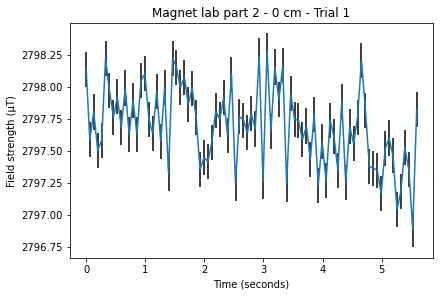

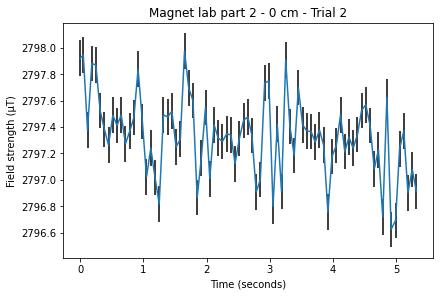

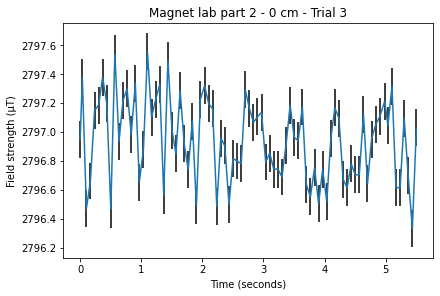

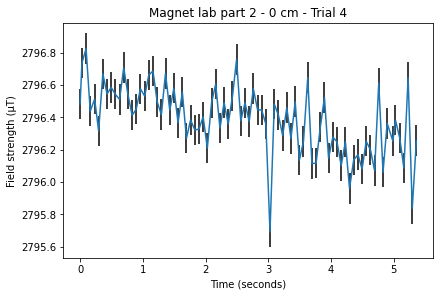

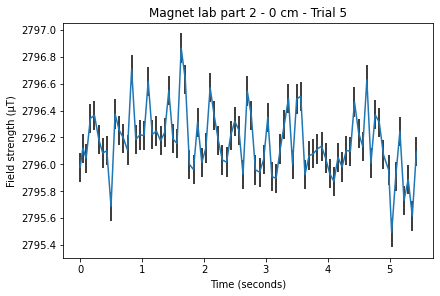

In [16]:
mean, stdev, chisq = modelling(testnum, dist1, filenames[:5])
np.savetxt('./out/data1.csv', np.vstack((mean, stdev, chisq)), delimiter=',')
# Looking at the first position's data values.
print("chi-squared analysis: ", chisq, "p-value = 1.0")
print("mean of each position: ", mean)
print("standard deviation: ", stdev)
print("standard error: ", stdev / np.sqrt(testnum))

2796.904978360206


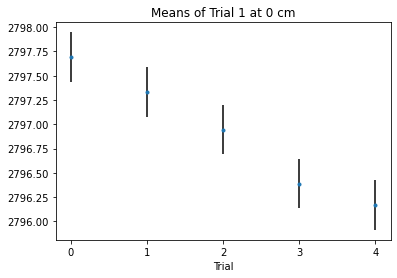

In [17]:
plt.figure()
x = np.arange(0, mean.shape[0])
plot = plt.errorbar(x, mean, yerr=np.std(mean) / np.sqrt(testnum), marker='.', ls='', ecolor='k')
# Calculating linear regression.
# m, b = np.polyfit(x, mean, 1)
# plot = plt.plot(x, m * x + b)
plt.title("Means of Trial 1 at 0 cm")
plt.xticks(np.arange(0, mean.shape[0], 1.0))
plt.xlabel("Trial")
totalmean[0] = mean
print(np.average(mean))

chi-squared analysis:  [0.00555807 0.00417558 0.00359573 0.0049125  0.00566307] p-value = 1.0
mean of each position:  [337.63944371 337.5588575  337.6445363  337.58783907 337.48506858]
standard deviation:  [0.14772009 0.12802173 0.11951268 0.1439792  0.14109694]
standard error:  [0.06606243 0.05725306 0.0534477  0.06438945 0.06310047]


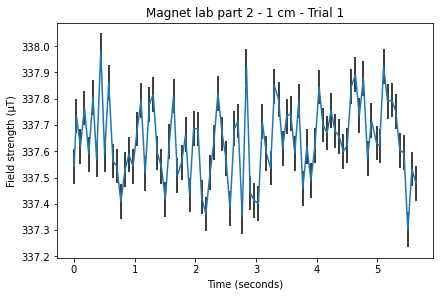

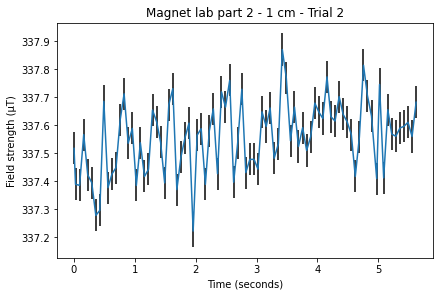

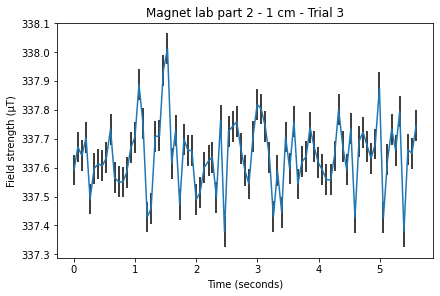

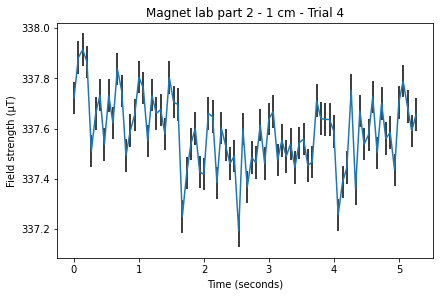

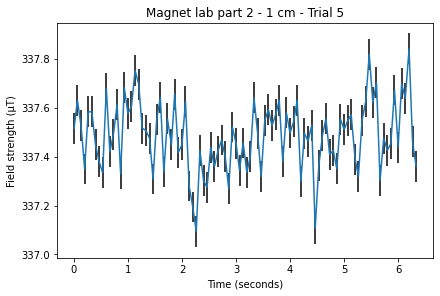

In [18]:
mean, stdev, chisq = modelling(testnum, dist2, filenames[5:10])
np.savetxt('./out/data2.csv', np.vstack((mean, stdev, chisq)), delimiter=',')
# Looking at the second position's data values.
print("chi-squared analysis: ", chisq, "p-value = 1.0")
print("mean of each position: ", mean)
print("standard deviation: ", stdev)
print("standard error: ", stdev / np.sqrt(testnum))

337.5831490316532


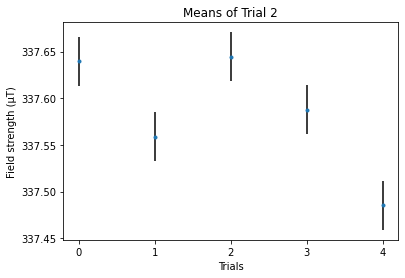

In [19]:
plt.figure()
x = np.arange(0, mean.shape[0])
plot = plt.errorbar(x, mean, yerr=np.std(mean) / np.sqrt(testnum), marker='.', ls='', ecolor='k')
# Calculating linear regression.
# m, b = np.polyfit(x, mean, 1)
# plot = plt.plot(x, m * x + b)
plt.title("Means of Trial 2")
plt.ylabel("Field strength (µT)")
plt.xlabel("Trials")
plt.xticks(np.arange(0, mean.shape[0], 1.0))

totalmean[1] = mean
print(np.average(mean))


chi-squared analysis:  [0.00384201 0.00594002 0.00385929 0.00371576 0.00476225] p-value = 1.0
mean of each position:  [337.5289324  330.64146462 330.61168577 330.64634375 330.61379865]
standard deviation:  [0.12351652 0.14939341 0.12324605 0.12022537 0.1377297 ]
standard error:  [0.05523827 0.06681077 0.05511731 0.05376642 0.0615946 ]


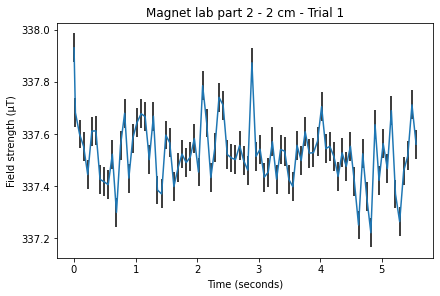

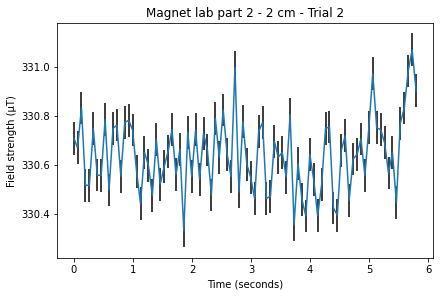

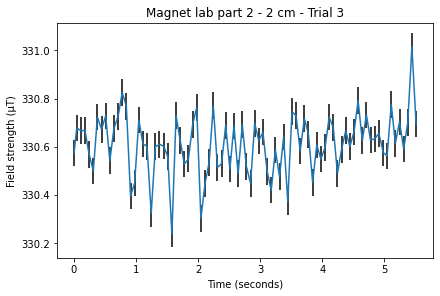

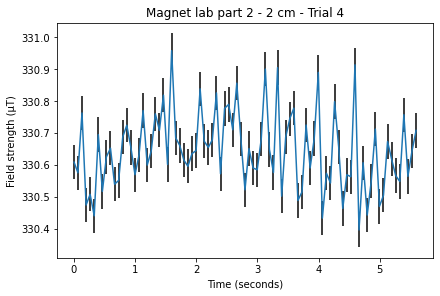

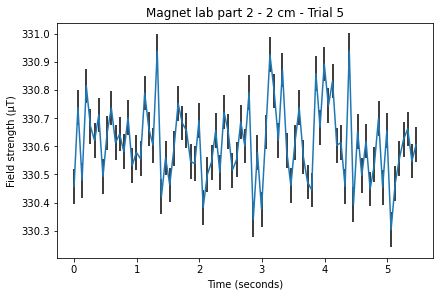

In [20]:
mean, stdev, chisq = modelling(testnum, dist3, filenames[10:15])
np.savetxt('./out/data2.csv', np.vstack((mean, stdev, chisq)), delimiter=',')
# Looking at the second position's data values.
print("chi-squared analysis: ", chisq, "p-value = 1.0")
print("mean of each position: ", mean)
print("standard deviation: ", stdev)
print("standard error: ", stdev / np.sqrt(testnum))

332.008445037834


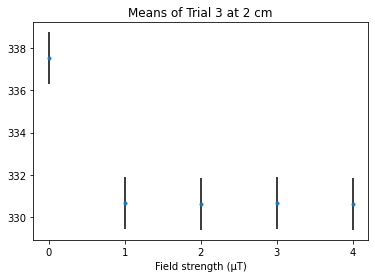

In [21]:
plt.figure()
x = np.arange(0, mean.shape[0])
plot = plt.errorbar(x, mean, yerr=np.std(mean) / np.sqrt(testnum), marker='.', ls='', ecolor='k')
# Calculating linear regression.
# m, b = np.polyfit(x, mean, 1)
# plot = plt.plot(x, m * x + b)
plt.title("Means of Trial 3 at 2 cm")
plt.xlabel("Field strength (µT)")
plt.xticks(np.arange(0, mean.shape[0], 1.0))

totalmean[2] = mean
print(np.average(mean))

chi-squared analysis:  [0.00384201 0.00594002 0.00385929 0.00371576 0.00476225] p-value = 1.0
mean of each position:  [337.5289324  330.64146462 330.61168577 330.64634375 330.61379865]
standard deviation:  [0.12351652 0.14939341 0.12324605 0.12022537 0.1377297 ]
standard error:  [0.05523827 0.06681077 0.05511731 0.05376642 0.0615946 ]


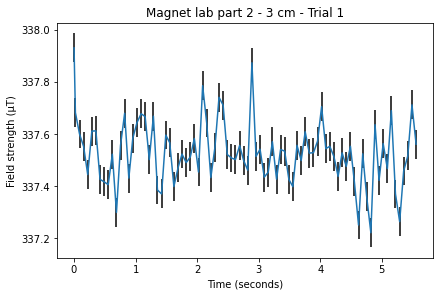

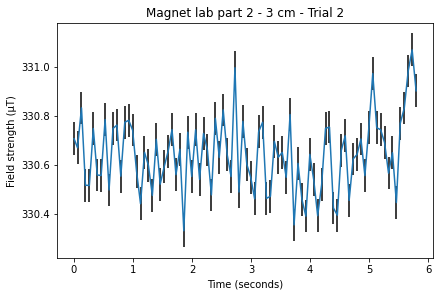

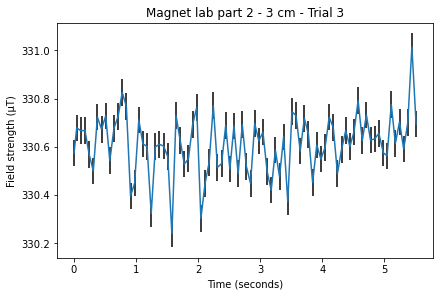

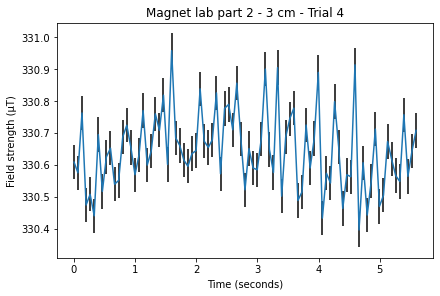

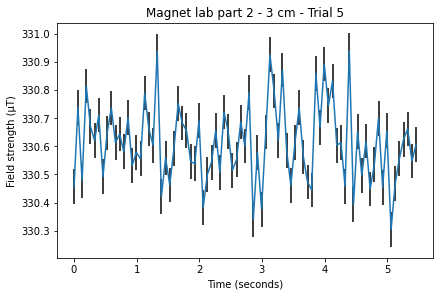

In [22]:
mean, stdev, chisq = modelling(testnum, dist3, filenames[15:20])
np.savetxt('./out/data2.csv', np.vstack((mean, stdev, chisq)), delimiter=',')
# Looking at the second position's data values.
print("chi-squared analysis: ", chisq, "p-value = 1.0")
print("mean of each position: ", mean)
print("standard deviation: ", stdev)
print("standard error: ", stdev / np.sqrt(testnum))

332.008445037834


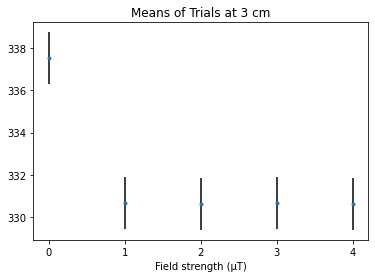

In [23]:
plt.figure()
x = np.arange(0, mean.shape[0])
plot = plt.errorbar(x, mean, yerr=np.std(mean) / np.sqrt(testnum), marker='.', ls='', ecolor='k')
# Calculating linear regression.
# m, b = np.polyfit(x, mean, 1)
# plot = plt.plot(x, m * x + b)
plt.title("Means of Trials at 3 cm")
plt.xlabel("Field strength (µT)")
plt.xticks(np.arange(0, mean.shape[0], 1.0))

totalmean[3] = mean
print(np.average(mean))

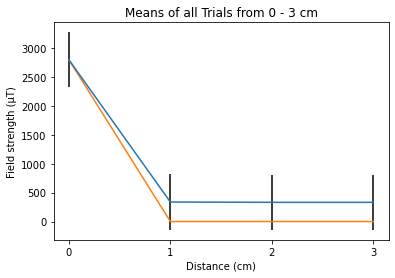

In [38]:
plt.figure()
# lambda exponential function for curve fitting.
exp = lambda t, a, b: a*np.exp(b*t)

x = np.arange(0, totalmean.shape[0])
plot = plt.errorbar(x, np.average(totalmean, axis=1), yerr=np.std(np.average(totalmean, axis=1)) / np.sqrt(testnum), ecolor='k')
plt.title("Means of all Trials from 0 - 3 cm")
plt.ylabel("Field strength (µT)")
plt.xlabel("Distance (cm)")
plt.xticks(np.arange(0, 4, 1.0))
fit, pcov = scipy.optimize.curve_fit(exp,  x,  np.average(totalmean, axis=1), p0=(3000, -70))
plt.plot(x, exp(fit[1], fit[0], x))